In [1]:
# Neural Networks

In [2]:
# Step 1: Data Exploration and Preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Load the dataset
df = pd.read_csv("C:\\Users\\Shreyas Mahale\\Downloads\\Neural networks\\Neural networks\\Alphabets_data.csv")

# 2. Exploration
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Shape:")
print(df.shape)

print("\nLast 5 rows of the dataset:")
print(df.tail())

print("\nDataset Info (checking for missing values and data types, if any at this stage):")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Checking for unique classes (should be 26 for A-Z)
unique_classes = df['letter'].unique()
print(f"\nUnique Classes ({len(unique_classes)}): {unique_classes}")

# 3. Handling Missing Values

if df.isnull().sum().sum() > 0:  # Condition
    print(f"\nFound a total of {df.isnull().sum().sum()} missing values.🧐 Dropping those rows now...")
    df = df.dropna()
else:
    print("\nNo missing values found.👍")

# 4. Separate Features and Target
X = df.drop('letter', axis=1)  # The 16 numerical features
y = df['letter']               # The target label

# 5. Data Normalization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Label Encoding
# Convert letters 'A', 'B', etc. into integers 0, 1, etc.
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("\nData Preprocessing Complete.")
print(f"Features shape: {X_scaled.shape}")
print(f"Target shape: {y_encoded.shape}")

First 5 rows of the dataset:
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  

Dataset Shape:
(20000, 17)

Last 5 rows of the dataset:
      letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
19995      D     2     2      3       3      2     7     7     

In [3]:
# Step 2: Model Implementation
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
from sklearn.model_selection import train_test_split

# 1. Divide the dataset into training and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# 2. Construct a basic ANN model
# We use a Sequential model: a linear stack of layers.
model = keras.Sequential([
    layers.Input(shape=(16,)),               # Input layer (16 features)
    layers.Dense(64, activation='relu'),     # Hidden layer 1
    layers.Dense(26, activation='softmax')   # Output layer (26 classes)
])

# 3. Compile the model
model.compile(
    optimizer='adam',                        # Standard optimizer
    loss='sparse_categorical_crossentropy',  # Use 'sparse' since y is integers (0, 1, 2...), not one-hot vectors
    metrics=['accuracy']
)

# 4. Train the model
print("\nTraining the Basic Model...")
history = model.fit(
    X_train, y_train,
    epochs=20,               # Number of times to go through the dataset
    batch_size=32,           # Number of samples per gradient update
    validation_split=0.2,    # Use 20% of training data for validation
    verbose=1
)

# Basic evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nBasic Model Test Accuracy: {test_acc:.4f}")

c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1

Training samples: 15000
Testing samples: 5000

Training the Basic Model...
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4096 - loss: 2.2219 - val_accuracy: 0.6167 - val_loss: 1.4645
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6889 - loss: 1.1826 - val_accuracy: 0.7213 - val_loss: 1.0372
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.7542 - loss: 0.9036 - val_accuracy: 0.7707 - val_loss: 0.8607
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.7908 - loss: 0.7668 - val_accuracy: 0.7907 - val_loss: 0.7518
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.8123 - loss: 0.6789 - val_accuracy: 0.8070 - val_loss: 0.6822
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8264 - loss: 0.6153 - val_accuracy: 0.8273 - val_loss: 0.6282
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.8408 - loss: 0.5681 - val_accuracy: 0.8373 - val_loss: 0.5828
Epoch 8/20
375/375 ━━

In [4]:
# Step 3: Hyper Parameter Tuning
import numpy as np

# Define hyperparameters to search
neurons_list = [64, 128]
activations = ['relu', 'tanh']
optimizers = ['adam', 'sgd']

best_acc = 0
best_params = {}

print("\nStarting Hyperparameter Tuning (Grid Search)...")

# Nested loops to try every combination
for act in activations:
    for opt in optimizers:
        for neurons in neurons_list:
            print(f"Testing: Activation={act}, Optimizer={opt}, Neurons={neurons}")
            
            # Build model with current parameters
            tuned_model = keras.Sequential([
                layers.Input(shape=(16,)),
                layers.Dense(neurons, activation=act),
                layers.Dense(26, activation='softmax')
            ])
            
            tuned_model.compile(
                optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )
            
            # Train briefly (fewer epochs to save time during search)
            tuned_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
            
            # Evaluate on test set
            _, acc = tuned_model.evaluate(X_test, y_test, verbose=0)
            print(f"--> Accuracy: {acc:.4f}")
            
            # Save if this is the best model so far
            if acc > best_acc:
                best_acc = acc
                best_params = {'activation': act, 'optimizer': opt, 'neurons': neurons}
                best_model = tuned_model

print("\nHyperparameter Tuning Complete.")
print(f"Best Accuracy: {best_acc:.4f}")
print(f"Best Parameters: {best_params}")


Starting Hyperparameter Tuning (Grid Search)...
Testing: Activation=relu, Optimizer=adam, Neurons=64
--> Accuracy: 0.8786
Testing: Activation=relu, Optimizer=adam, Neurons=128
--> Accuracy: 0.9062
Testing: Activation=relu, Optimizer=sgd, Neurons=64
--> Accuracy: 0.7442
Testing: Activation=relu, Optimizer=sgd, Neurons=128
--> Accuracy: 0.7670
Testing: Activation=tanh, Optimizer=adam, Neurons=64
--> Accuracy: 0.8556
Testing: Activation=tanh, Optimizer=adam, Neurons=128
--> Accuracy: 0.8698
Testing: Activation=tanh, Optimizer=sgd, Neurons=64
--> Accuracy: 0.7446
Testing: Activation=tanh, Optimizer=sgd, Neurons=128
--> Accuracy: 0.7606

Hyperparameter Tuning Complete.
Best Accuracy: 0.9062
Best Parameters: {'activation': 'relu', 'optimizer': 'adam', 'neurons': 128}


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step

Classification Report (Best Model):
              precision    recall  f1-score   support

           A       0.94      0.95      0.95       191
           B       0.88      0.89      0.88       188
           C       0.92      0.89      0.90       165
           D       0.89      0.90      0.90       204
           E       0.86      0.90      0.88       195
           F       0.89      0.88      0.88       176
           G       0.87      0.90      0.88       195
           H       0.79      0.75      0.77       175
           I       0.92      0.88      0.90       187
           J       0.91      0.92      0.92       185
           K       0.83      0.84      0.83       165
           L       0.92      0.94      0.93       191
           M       0.96      0.94      0.95       209
           N       0.90      0.93      0.92       191
           O       0.87      0.91      0.89       176
           P       0.97      0.87      0.92       210
 

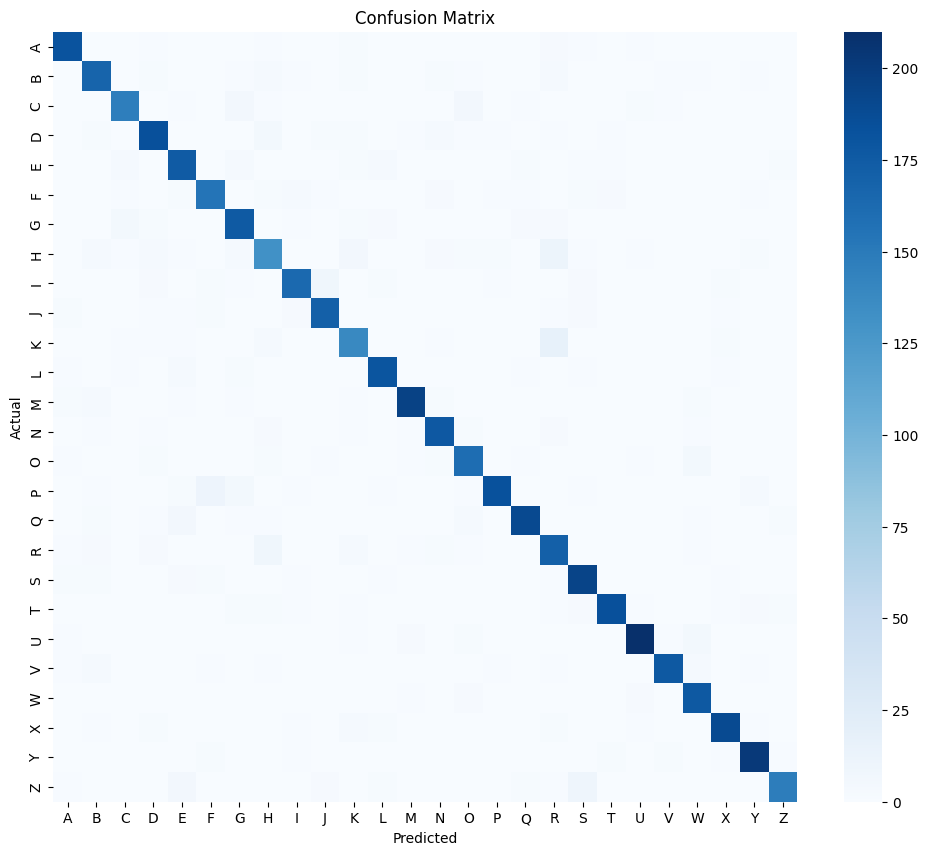

In [5]:
# Step 4: Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Making predictions with the best model
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Convert probabilities to class integers

# Generating Classification Report
# We mapping the numeric labels (0-25) back to letters (A-Z) for readability
class_names = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")

print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()